In [4]:
# import basic packages for managing dataframe
import pandas as pd
import numpy as np
from datetime import datetime

# import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# regardless warnings
import warnings 
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# import model package 
# regression and classification
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier

#clustering
from sklearn.cluster import KMeans

# import measurement package
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn import metrics


# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#for handling imbalanced data 
import imblearn
#from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#######################################################################################
# Since the adaboost and linear svm usinig SMOTE method requires a long time to run
# So we stored results into the following 4 files
# You can read those files to see the results

In [0]:
df1 = pd.read_csv('Linear_SVM.csv',engine='python')
df2 = pd.read_csv('Linear_SVM_not_pca_tag.csv',engine='python')
df3 = pd.read_csv('adaboost_result.csv',engine='python')
df4 = pd.read_csv('adaboost_not_pca_tag.csv',engine='python')

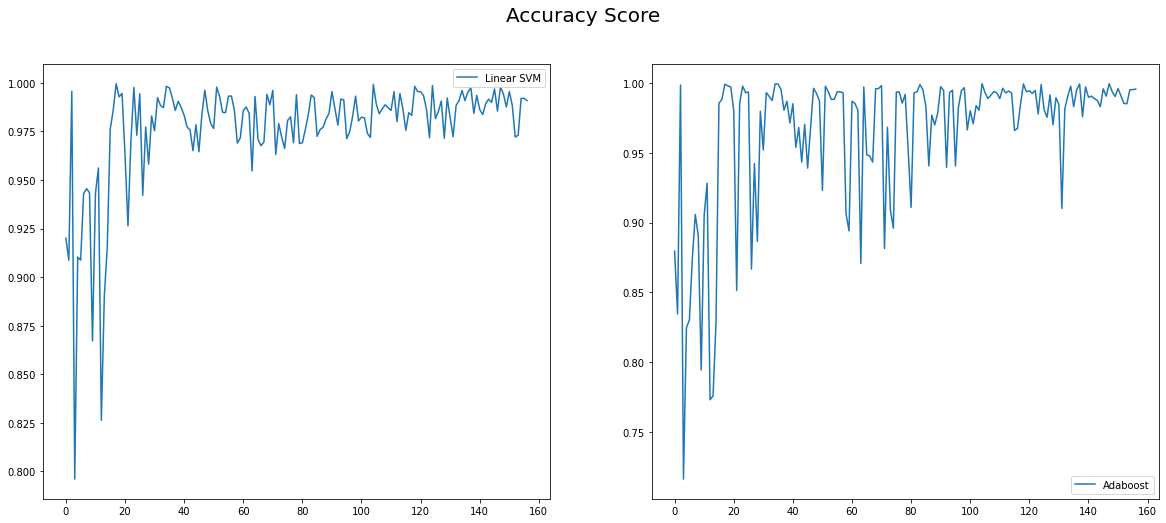

In [8]:

fig, ax = plt.subplots(1, 2, figsize=(20,8))
fig.suptitle('Accuracy Score',fontsize=20)
ax[0].plot(df1.accuracy,label='Linear SVM')
ax[1].plot(df3.accuracy,label='Adaboost')
ax[0].legend()
ax[1].legend()
plt.show()

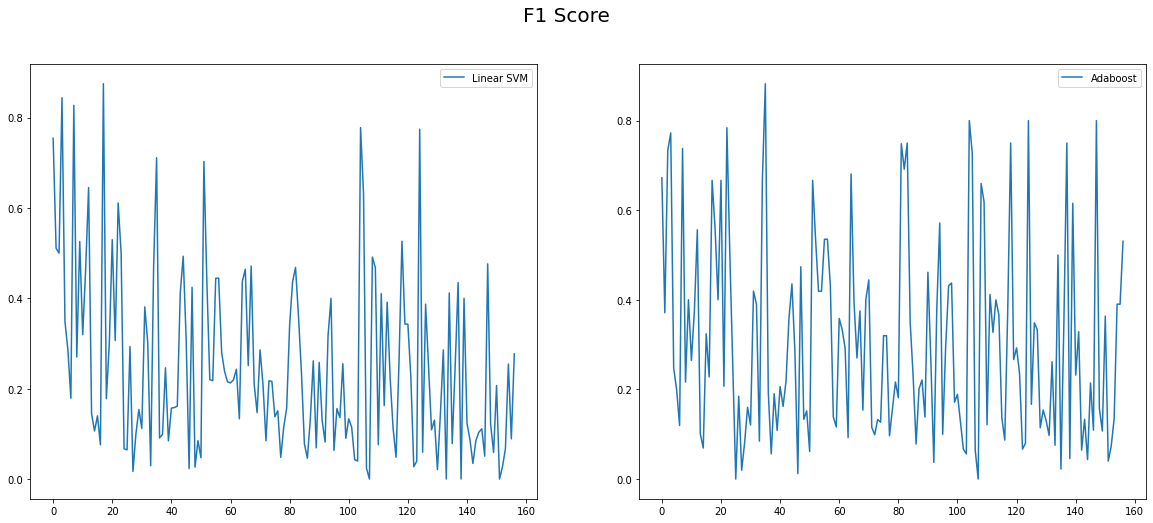

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
fig.suptitle('F1 Score ',fontsize=20)
ax[0].plot(df1.f1_score,label='Linear SVM')
ax[1].plot(df3.f1_score,label='Adaboost')
ax[0].legend()
ax[1].legend()
plt.show()

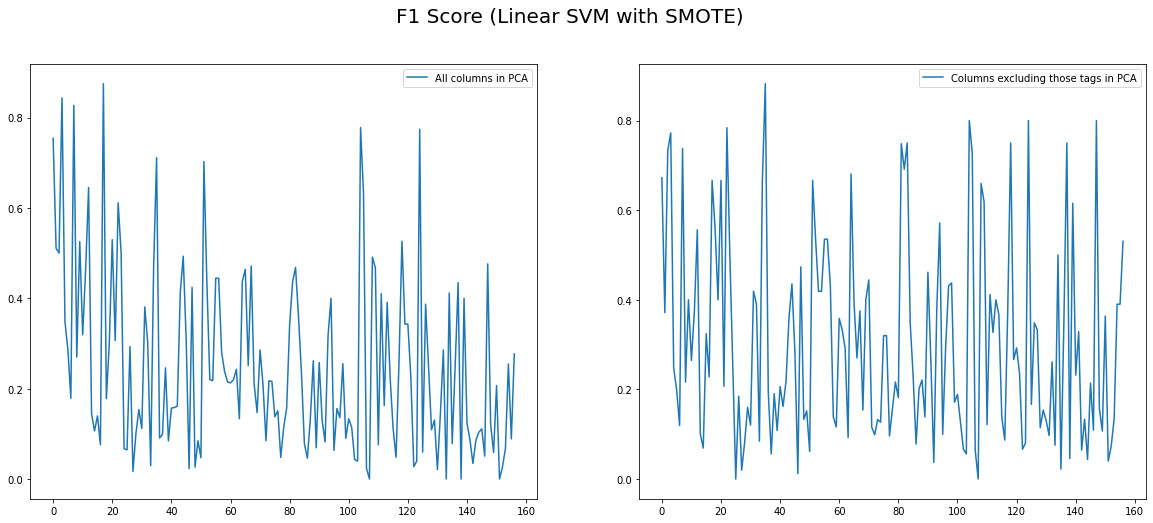

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
fig.suptitle('F1 Score (Linear SVM with SMOTE)',fontsize=20)
ax[0].plot(df1.f1_score,label='All columns in PCA')
ax[1].plot(df3.f1_score,label='Columns excluding those tags in PCA')
ax[0].legend()
ax[1].legend()
plt.show()

In [0]:
##################################################################################################################################################
# Below are the code for Adaboost and LinearSVM with SMOTE method

In [0]:
df_train = pd.read_csv('train.csv',engine='python')
df_test = pd.read_csv('test.csv',engine='python')

In [0]:
len(df_train)

12043

In [0]:
len(df_test)

5162

In [0]:
columns_not_include = ['RECORDID','Tags','Tag_Count' 'Vec_Tags', 'Body', 'Body_Lemm',
       'Body_Lemm_lower', 'Body_Token','Body_Length','Title', 'Title_Lemm',
       'Title_Lemm_lower', 'Title_Token']

# split train and test
X_train = df_train.loc[:, ~df_train.columns.isin(columns_not_include)]

X_test = df_test.loc[:, ~df_test.columns.isin(columns_not_include)]


X_train= X_train.iloc[:,2:]
X_test= X_test.iloc[:,2:]



In [0]:
# Here we tried two ways when we use PCA. 
# The first way is to put all columns into PCA
# The second way is to put columns except "tag_count" into PCA

In [0]:
# Only put some variables not tag_count into PCA

In [0]:

X_train_not_pca = X_train.iloc[:,-314:]
X_test_not_pca = X_test.iloc[:,-314:]

X_train_pca = X_train.iloc[:,:1221]
X_test_pca = X_test.iloc[:,:1221]


In [0]:
X_train_pca

,Title_Length,Title_Com_Sent,Title_Pos_Sent,Title_Neu_Sent,Title_Neg_Sent,Body_Com_Sent,Body_Pos_Sent,Body_Neu_Sent,Body_Neg_Sent,noun,prop_noun,possessive,verb,adjective,adverb,conjunction,determiner,expression,text_list,modal,number,outlet remove_a_c,outlet remove_a_f,process_a_c,process_a_f,provide_a_c,provide_a_f,article summary article_a_c,article summary article_a_f,operating_a_c,operating_a_f,reference im_a_c,reference im_a_f,state_a_c,state_a_f,option_a_c,option_a_f,margin leave_a_c,margin leave_a_f,removal pre removal_a_c,...,dell data protection_t_c,dell data protection_t_f,storage_t_c,storage_t_f,controller_t_c,controller_t_f,drive_t_c,drive_t_f,pc_t_c,pc_t_f,card_t_c,card_t_f,dell encryption_t_c,dell encryption_t_f,usage_t_c,usage_t_f,power_t_c,power_t_f,driver cab_t_c,driver cab_t_f,dell laser printer_t_c,dell laser printer_t_f,dell pc_t_c,dell pc_t_f,encryption_t_c,encryption_t_f,dell laser printers_t_c,dell laser printers_t_f,removal_t_c,removal_t_f,microsoft_t_c,microsoft_t_f,printers_t_c,printers_t_f,venue_t_c,venue_t_f,windows 10 driver_t_c,windows 10 driver_t_f,use_t_c,use_t_f
0,10,-0.4019,0.000,0.769,0.231,-0.5434,0.054,0.880,0.066,0.470000,0.000000,0.000000,0.140000,0.200000,0.030000,0.010000,0.060000,0.000000,0.0,0.010000,0.080000,0,0.0,0,0.0,2,0.009804,0,0.0,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,...,0,0.000000,0,0.0,1,0.1,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,1,0.100000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,7,-0.4404,0.152,0.505,0.343,-0.3197,0.127,0.750,0.124,0.583756,0.000000,0.000000,0.131980,0.106599,0.015228,0.045685,0.015228,0.010152,0.0,0.010152,0.081218,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.000000,0,0.000000,0,0.000000,1,0.004975,4,0.019900,0,...,0,0.000000,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,12,-0.4466,0.000,0.754,0.246,-0.6523,0.057,0.832,0.111,0.500000,0.000000,0.000000,0.102564,0.141026,0.038462,0.012821,0.025641,0.012821,0.0,0.025641,0.141026,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.000000,0,0.000000,1,0.012658,0,0.000000,0,0.000000,0,...,0,0.000000,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,1,0.083333,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,5,0.0000,0.000,1.000,0.000,0.9986,0.131,0.866,0.003,0.625843,0.004494,0.006742,0.111236,0.137079,0.019101,0.035955,0.007865,0.004494,0.0,0.000000,0.047191,0,0.0,0,0.0,5,0.005618,0,0.0,0,0.000000,2,0.002247,0,0.000000,0,0.000000,0,0.000000,0,...,0,0.000000,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.2
4,6,0.0000,0.000,1.000,0.000,-0.9946,0.012,0.922,0.066,0.493416,0.036036,0.030492,0.031878,0.047124,0.005544,0.002079,0.029106,0.000000,0.0,0.000000,0.324324,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,...,0,0.000000,0,0.0,0,0.0,1,0.166667,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,11,0.0000,0.000,1.000,0.000,0.9618,0.103,0.876,0.021,0.496032,0.003968,0.000000,0.126984,0.162698,0.027778,0.043651,0.003968,0.011905,0.0,0.019841,0.103175,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.000000,0,0.000000,0,0.000000,3,0.011673,2,0.007782,0,...,1,0.090909,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
12039,7,0.0000,0.000,1.000,0.000,0.9559,0.167,0.833,0.000,0.409524,0.000000,0.009524,0.133333,0.076190,0.085714,0.076190,0.152381,0.009524,0.0,0.038095,0.009524,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,...,0,

In [0]:
# Run PCA for the total dataset(Train+Test)

X_train_pca = X_train_pca.fillna(0)
X_test_pca = X_test_pca.fillna(0)
scaler = StandardScaler()
scaler.fit(X_train_pca)
X_train_pca = scaler.transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)
pca = PCA(0.9)
pca.fit(X_train_pca)
X_train_pca = pd.DataFrame(pca.transform(X_train_pca))
X_test_pca = pd.DataFrame(pca.transform(X_test_pca))


In [0]:
# Combine dataset after PCA and not PCA
#result = pd.concat([df1, s1], axis=1)
X_train = pd.concat([X_train_pca , X_train_not_pca],axis=1)
X_test = pd.concat([X_test_pca , X_test_not_pca],axis=1)

In [0]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,supportassist enterprise_a_tag,supportassist enterprise_t_tag,tablets_a_tag,tablets_t_tag,dell security tools_a_tag,dell security tools_t_tag,venue 5130 pro 64bit_a_tag,venue 5130 pro 64bit_t_tag,venue 5130 pro 32bit_a_tag,venue 5130 pro 32bit_t_tag,vmware esxi 5 x_a_tag,vmware esxi 5 x_t_tag,diagnostics_a_tag,diagnostics_t_tag,no network internet_a_tag,no network internet_t_tag,latitude e6420 xfr_a_tag,latitude e6420 xfr_t_tag,no boot_a_tag,no boot_t_tag,alienware 17 r4_a_tag,alienware 17 r4_t_tag,raid_a_tag,raid_t_tag,red hat enterprise linux version 7_a_tag,red hat enterprise linux version 7_t_tag,latitude e7450_a_tag,latitude e7450_t_tag,latitude e7250 7250_a_tag,latitude e7250 7250_t_tag,poweredge r720xd_a_tag,poweredge r720xd_t_tag,poweredge r620_a_tag,poweredge r620_t_tag,powerswitch n2000 series_a_tag,powerswitch n2000 series_t_tag,powerswitch n1500 series_a_tag,powerswitch n1500 series_t_tag,dell networking n3000 series_a_tag,dell networking n3000 series_t_tag
0,-1.994178,-2.223042,-1.816635,-2.210210,-2.566465,-2.513036,0.732621,0.424427,2.276577,-2.365813,-0.264559,8.564096,0.116777,0.331092,4.487846,-1.520325,2.052491,-0.438031,0.549139,1.438705,1.104625,-0.536934,-1.841772,-0.159110,1.405676,-1.917904,-1.772311,-2.037613,-1.483218,0.187384,2.059701,-1.966211,-1.633627,-0.404392,-0.640173,-0.769490,-2.867125,-0.169424,3.079159,-0.139807,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-2.491166,-3.423899,-3.298366,-5.257850,17.984667,2.486755,-4.522914,1.200543,-0.081877,-0.170764,-0.027167,-0.593157,-0.261292,1.519063,1.041090,2.466270,1.466010,0.000844,3.523578,4.364108,-1.021308,-6.157357,1.675123,3.348074,-4.557200,-8.383814,2.928582,1.234502,-1.096113,0.702811,-3.260439,-2.379918,1.019056,0.290118,-0.922080,-1.739143,0.714401,1.085485,-0.100090,-0.976618,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.026949,-2.378252,-2.592194,-1.392310,-2.382595,-1.853836,-3.558237,-1.924184,-2.222587,1.887241,0.821551,1.642128,0.360744,0.890421,0.732569,-1.961757,-0.170427,-0.522980,1.975565,0.864533,-0.388516,-2.299092,-0.529696,-0.936355,3.413953,-0.184535,-0.386619,0.851274,0.967620,-2.879349,0.320735,-1.356783,-1.392362,-1.443089,1.326395,-1.499044,0.781793,-1.444225,1.590702,0.585505,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-1.358792,-2.205901,10.729847,14.818036,4.401549,-5.212587,-4.099141,3.044592,3.332311,-2.841762,0.935874,1.524766,4.770780,-6.623882,-2.623215,3.175142,-4.337994,0.640565,1.636500,1.241029,5.265908,0.202466,3.283905,2.376889,0.129363,7.725528,1.439897,-0.225678,1.641008,-0.291928,-0.220092,0.207899,-2.306378,0.774786,-0.086767,-2.617029,-3.956754,4.658922,-5.385973,-3.786703,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-12.091245,64.273096,-21.115889,14.107150,2.560263,4.153891,1.754051,1.798487,1.023998,-0.927308,-0.775512,-2.796080,5.106738,-0.363342,-0.763833,-2.191992,-3.869309,0.274619,-0.123945,5.679677,-2.538812,1.034793,1.461371,5.628963,6.473059,-11.055156,-7.014133,-11.196033,2.565032,14.285772,8.927424,3.462842,-8.907446,-4.425873,5.834867,-3.835835,-0.029183,-0.726945,-2.925902,5.964806,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,-2.452253,-3.828073,-3.112827,-5.789585,23.591581,3.218372,-2.244904,1.788303,-0.968246,-0.366361,-0.715287,0.340418,0.258074,-0.256689,-1.737247,-3.067530,-0.323368,0.347670,-1.133861,-1.250937,1.151839,1.299109,-1.2100

In [0]:
# Linear SVM using SMOTE

In [0]:
accuracy = []
f1_score_list=[]
roc = []
# compute how many 1 in each model
sum_train=[]
sum_test=[]

X_train_svm = X_train.copy()
X_test_svm = X_test.copy()
for num_models in range(0,157): 
    # create y_train and y_test
    y_train = []
    y_test = []
    for i  in range(len(df_train)):
        y_train.append(int(df_train['Vec_Tags'].iloc[i].split(']')[0].split('[')[1].split(',')[num_models].rstrip(' ').lstrip(' ')))
    for j  in range(len(df_test)):
        y_test.append(int(df_test['Vec_Tags'].iloc[j].split(']')[0].split('[')[1].split(',')[num_models].rstrip(' ').lstrip(' ')))
    
    sum_train.append(sum(y_train))
    sum_test.append(sum(y_test))

    y_train_arr= np.array(y_train)
    y_test_arr= np.array(y_test)
    
    sm = SMOTE(random_state = 2) 
    X_train_ovs_arr, y_train_ovs = sm.fit_sample(X_train_svm, y_train_arr.ravel()) #ovs= denotes oversampled data

  #  X_train_df = pd.DataFrame(X_train_ovs_arr)

    svm_sm = LinearSVC().fit(X_train_ovs_arr, y_train_ovs)

    # Train Adaboost Classifer with over
    y_pred_test = svm_sm.predict(X_test_svm)
    y_pred_train = svm_sm.predict(X_train_ovs_arr)


    acc = accuracy_score(y_test, y_pred_test)
    f1_score = metrics.f1_score(y_test, y_pred_test)
    roc_score = metrics.roc_auc_score(y_test, y_pred_test)

    roc.append(roc_score)
    accuracy.append(acc)
    f1_score_list.append(f1_score)
    
    #X_train_svm['predict_'+str(num_models)] = y_pred_train
   # X_test_svm['predict_'+str(num_models)] = y_pred_test

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function 

In [0]:
data_tuples = list(zip(accuracy,f1_score_list,roc,sum_test))
result_svm_sm = pd.DataFrame(data_tuples,columns=['accuracy','f1_score','roc','sum_test'])
result_svm_sm['sum_test'] = result_svm_sm['sum_test']/len(X_test)
result_svm_sm

,accuracy,f1_score,roc,sum_test
0,0.919799,0.757611,0.910403,0.139675
1,0.897520,0.472582,0.825324,0.061798
2,0.995544,0.488889,0.890915,0.002712
3,0.795428,0.842435,0.787438,0.674932
4,0.905657,0.360053,0.803051,0.038357
...,...,...,...,...
152,0.973654,0.028571,0.687105,0.000969
153,0.970167,0.037500,0.699737,0.001356
154,0.991670,0.245614,0.715446,0.003100
155,0.991089,0.080000,0.587318,0.002131


In [0]:
result_svm_sm.to_csv('Linear_SVM_not_pca_tag.csv')

In [0]:
result_svm_sm_old=pd.read_csv('Linear_svm_result_157.csv')
result_svm_sm_old

,Unnamed: 0,accuracy,f1_score,roc,sum_test
0,0,0.919992,0.754020,0.902383,0.139675
1,1,0.908756,0.510903,0.844490,0.061798
2,2,0.995738,0.500000,0.891012,0.002712
3,3,0.796009,0.843745,0.785243,0.674932
4,4,0.910306,0.348805,0.773949,0.038357
...,...,...,...,...,...
152,152,0.972104,0.027027,0.686329,0.000969
153,153,0.973072,0.067114,0.843855,0.001356
154,154,0.992057,0.254545,0.715641,0.003100
155,155,0.992057,0.088889,0.587803,0.002131


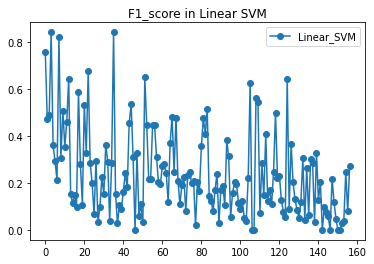

In [0]:
plt.plot(result_svm_sm.f1_score,label='Linear_SVM',marker='o')
plt.title('F1_score in Linear SVM')
#plt.xlim(0,9)
plt.legend()
plt.show()

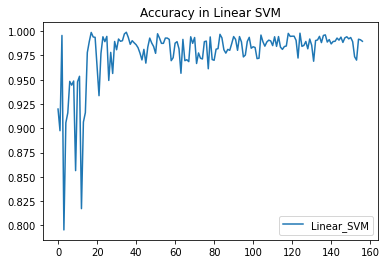

In [0]:
plt.plot(result_svm_sm.accuracy,label='Linear_SVM')
plt.title('Accuracy in Linear SVM')
#plt.xlim(0,9)
plt.legend()
plt.show()

In [0]:
result_svm_sm.f1_score.mean()

0.23960427492089817

In [0]:
# Adaboost using SMOTE

In [0]:
accuracy = []
f1_score_list=[]
roc = []
# compute how many 1 in each model
sum_train=[]
sum_test=[]

X_train_ada = X_train.copy()
X_test_ada = X_test.copy()
for num_models in range(0,157): 
    # create y_train and y_test
    y_train = []
    y_test = []
    for i  in range(len(df_train)):
        y_train.append(int(df_train['Vec_Tags'].iloc[i].split(']')[0].split('[')[1].split(',')[num_models].rstrip(' ').lstrip(' ')))
    for j  in range(len(df_test)):
        y_test.append(int(df_test['Vec_Tags'].iloc[j].split(']')[0].split('[')[1].split(',')[num_models].rstrip(' ').lstrip(' ')))
    
    sum_train.append(sum(y_train))
    sum_test.append(sum(y_test))

    y_train_arr= np.array(y_train)
    y_test_arr= np.array(y_test)
    
    #SMOTE
    sm = SMOTE(random_state = 2) 
    X_train_ovs, y_train_ovs = sm.fit_sample(X_train_ada, y_train_arr.ravel()) #ovs= denotes oversampled data
    
    
    ada =AdaBoostClassifier(n_estimators=50, algorithm='SAMME', learning_rate=1)

    # Train Adaboost Classifer with oversampled data
    abc_ovs = ada.fit(X_train_ovs, y_train_ovs)
    y_pred_test = abc_ovs.predict(X_test_ada)
    y_pred_train = abc_ovs.predict(X_train_ovs)


    acc_ada = accuracy_score(y_test, y_pred_test)
    f1_score_ada = metrics.f1_score(y_test, y_pred_test)
    roc_ada = metrics.roc_auc_score(y_test, y_pred_test)

    roc.append(roc_ada)
    accuracy.append(acc_ada)
    f1_score_list.append(f1_score_ada)
    
  #  X_train_ovs['predict_'+str(num_models)] = y_pred_train
  #  X_test_ada['predict_'+str(num_models)] = y_pred_test

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [0]:
data_tuples = list(zip(accuracy,f1_score_list,roc,sum_test))
result_ada= pd.DataFrame(data_tuples,columns=['accuracy','f1_score','roc','sum_test'])
result_ada['sum_test'] = result_ada['sum_test']/len(X_test)
result_ada.to_csv('ada_result.csv')

In [0]:
result_ada

,accuracy,f1_score,roc,sum_test
0,0.882410,0.677642,0.883445,0.139675
1,0.839985,0.381737,0.821016,0.061798
2,0.999031,0.800000,0.857046,0.002712
3,0.737311,0.792914,0.733109,0.674932
4,0.889578,0.296296,0.753473,0.038357
...,...,...,...,...
152,0.985664,0.075000,0.793019,0.000969
153,0.984308,0.129032,0.920812,0.001356
154,0.996513,0.500000,0.780181,0.003100
155,0.996319,0.387097,0.771368,0.002131


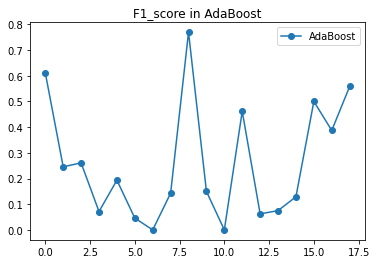

In [0]:
plt.plot(result_ada.f1_score,label='AdaBoost',marker='o')
plt.title('F1_score in AdaBoost')
#plt.xlim(0,9)
plt.legend()
plt.show()

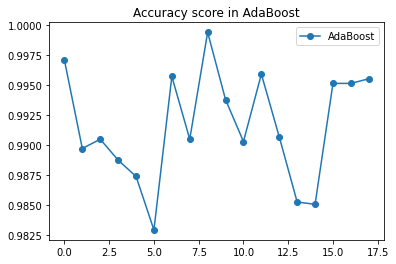

In [0]:
plt.plot(result_ada.accuracy,label='AdaBoost',marker='o')
plt.title('Accuracy score in AdaBoost')
#plt.xlim(0,9)
plt.legend()
plt.show()

In [0]:
result_ada

,accuracy,f1_score,roc,sum_test
0,0.879504,0.672287,0.881757,0.139675
1,0.834560,0.371134,0.813733,0.061798
2,0.998450,0.733333,0.892372,0.002712
3,0.716389,0.772600,0.717764,0.674932
4,0.824680,0.247714,0.790042,0.038357
...,...,...,...,...
134,0.997675,0.500000,0.874030,0.001550
135,0.982952,0.022222,0.534191,0.002325
136,0.994963,0.350000,0.886560,0.001744
137,0.999225,0.750000,0.999612,0.001162
